<a href="https://colab.research.google.com/github/orinbou/PhysicsPythonColab/blob/main/Collatz_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collatzの問題
```
正の整数 n をスタートし，
奇数ならば3倍して1を足す
偶数ならば2で割る
ことを繰り返すと，いずれ必ず
1 になる
```
※参考：
* https://okumuralab.org/~okumura/python/collatz.html
* https://ja.wikipedia.org/wiki/%E3%82%B3%E3%83%A9%E3%83%83%E3%83%84%E3%81%AE%E5%95%8F%E9%A1%8C

懸賞金：株式会社音圧爆上げくん
* https://mathprize.net/ja/posts/collatz-conjecture/

In [ ]:
%%latex
\displaystyle
f(n)=
\left\{
\begin{array}{l}
n / 2 && (n : 偶数)
\\
3n + 1 && (n : 奇数)
\end{array}
\right.

<IPython.core.display.Latex object>

## その（1）泥臭く求めてみる

In [ ]:
def collatz(n):
    print(n, end="")
    while (n > 1):
        if (n % 2 == 0):
            n = n // 2
        else:
            n = 3 * n + 1
        print(" →", n, end="")
    print()

In [ ]:
collatz(1)
collatz(2)
collatz(3)
collatz(4)
collatz(5)
collatz(6)
collatz(7)
collatz(8)
collatz(9)
collatz(10)
collatz(100)
collatz(1000)
collatz(10000)

1
2 → 1
3 → 10 → 5 → 16 → 8 → 4 → 2 → 1
4 → 2 → 1
5 → 16 → 8 → 4 → 2 → 1
6 → 3 → 10 → 5 → 16 → 8 → 4 → 2 → 1
7 → 22 → 11 → 34 → 17 → 52 → 26 → 13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1
8 → 4 → 2 → 1
9 → 28 → 14 → 7 → 22 → 11 → 34 → 17 → 52 → 26 → 13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1
10 → 5 → 16 → 8 → 4 → 2 → 1
100 → 50 → 25 → 76 → 38 → 19 → 58 → 29 → 88 → 44 → 22 → 11 → 34 → 17 → 52 → 26 → 13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1
1000 → 500 → 250 → 125 → 376 → 188 → 94 → 47 → 142 → 71 → 214 → 107 → 322 → 161 → 484 → 242 → 121 → 364 → 182 → 91 → 274 → 137 → 412 → 206 → 103 → 310 → 155 → 466 → 233 → 700 → 350 → 175 → 526 → 263 → 790 → 395 → 1186 → 593 → 1780 → 890 → 445 → 1336 → 668 → 334 → 167 → 502 → 251 → 754 → 377 → 1132 → 566 → 283 → 850 → 425 → 1276 → 638 → 319 → 958 → 479 → 1438 → 719 → 2158 → 1079 → 3238 → 1619 → 4858 → 2429 → 7288 → 3644 → 1822 → 911 → 2734 → 1367 → 4102 → 2051 → 6154 → 3077 → 9232 → 4616 → 2308 → 1154 → 577 → 1732 → 866 → 433 → 1300 → 650 → 325 → 976 →

## その（2）途中でどれくらい大きい数になるか？


In [ ]:
def collatz_max(n):
    nmax = n
    while (n > 1):
        if (n % 2 == 0):
            n = n // 2
        else:
            n = 3 * n + 1
            if n > nmax:
                nmax = n
    return nmax

In [ ]:
mmax = 0
for n in range(100):
    m = collatz_max(n)
    if (m > mmax):
        print(n, m)
        mmax = m

1 1
2 2
3 16
7 52
15 160
27 9232


In [ ]:
mmax = 0
for n in range(10000):
    m = collatz_max(n)
    if (m > mmax):
        print(n, m)
        mmax = m

1 1
2 2
3 16
7 52
15 160
27 9232
255 13120
447 39364
639 41524
703 250504
1819 1276936
4255 6810136
4591 8153620
9663 27114424


## その（3）可視化


(n, max) = (1, 1)
(n, max) = (2, 2)
(n, max) = (3, 16)
(n, max) = (7, 52)
(n, max) = (15, 160)
(n, max) = (27, 9232)
(n, max) = (255, 13120)
(n, max) = (447, 39364)
(n, max) = (639, 41524)
(n, max) = (703, 250504)
(n, max) = (1819, 1276936)
(n, max) = (4255, 6810136)
(n, max) = (4591, 8153620)
(n, max) = (9663, 27114424)
(n, max) = (20895, 50143264)
(n, max) = (26623, 106358020)
(n, max) = (31911, 121012864)
(n, max) = (60975, 593279152)
(n, max) = (77671, 1570824736)

★処理時間[秒]： 5.64792


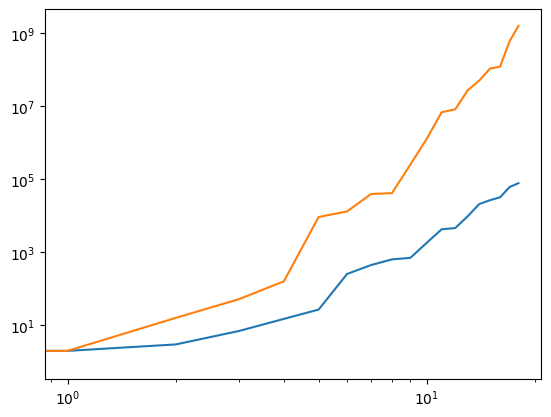

In [ ]:
import time
import matplotlib.pyplot as plt
ln = []
lm = []

start_time = time.perf_counter()

mmax = 0
for n in range(100000):
  m = collatz_max(n)
  if (m > mmax):
    #print(n, m)
    print("(n, max) = ({}, {})".format(n, m))
    ln.append(n)
    lm.append(m)
    mmax = m

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print()
print("★処理時間[秒]：", format(elapsed_time, '.5f'))

plt.plot(ln, label='n')
plt.xscale('log')
plt.plot(lm, label='m')
plt.yscale('log')
plt.show()

1 1
2 2
3 16
7 52
15 160
27 9232
255 13120
447 39364
639 41524
703 250504
1819 1276936
4255 6810136
4591 8153620
9663 27114424
20895 50143264
26623 106358020
31911 121012864
60975 593279152
77671 1570824736
113383 2482111348
138367 2798323360
159487 17202377752
270271 24648077896
665215 52483285312
704511 56991483520

★処理時間[秒]： 22.67662


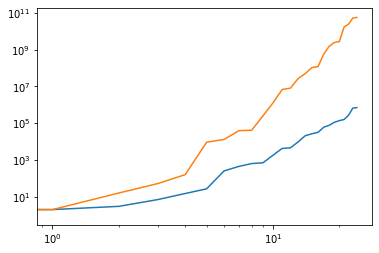

In [ ]:
import time
import matplotlib.pyplot as plt
ln = []
lm = []

start_time = time.perf_counter()

mmax = 0
for n in range(1000000):
  m = collatz_max(n)
  if (m > mmax):
    print(n, m)
    ln.append(n)
    lm.append(m)
    mmax = m

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print()
print("★処理時間[秒]：", format(elapsed_time, '.5f'))

plt.plot(ln, label='n')
plt.xscale('log')
plt.plot(lm, label='m')
plt.yscale('log')
plt.show()

1 1
2 2
3 16
7 52
15 160
27 9232
255 13120
447 39364
639 41524
703 250504
1819 1276936
4255 6810136
4591 8153620
9663 27114424
20895 50143264
26623 106358020
31911 121012864
60975 593279152
77671 1570824736
113383 2482111348
138367 2798323360
159487 17202377752
270271 24648077896
665215 52483285312
704511 56991483520
1042431 90239155648
1212415 139646736808
1441407 151629574372
1875711 155904349696
1988859 156914378224
2643183 190459818484
2684647 352617812944
3041127 622717901620
3873535 858555169576
4637979 1318802294932
5656191 2412493616608
6416623 4799996945368
6631675 60342610919632

★処理時間[秒]： 253.07237


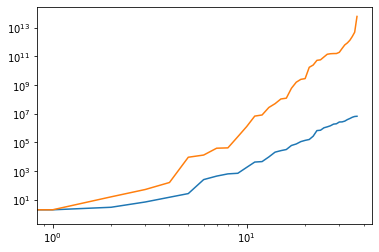

In [ ]:
import time
import matplotlib.pyplot as plt
ln = []
lm = []

start_time = time.perf_counter()

mmax = 0
for n in range(10000000):
  m = collatz_max(n)
  if (m > mmax):
    print(n, m)
    ln.append(n)
    lm.append(m)
    mmax = m

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print()
print("★処理時間[秒]：", format(elapsed_time, '.5f'))

plt.plot(ln, label='n')
plt.xscale('log')
plt.plot(lm, label='m')
plt.yscale('log')
plt.show()

1 1
2 2
3 16
7 52
15 160
27 9232
255 13120
447 39364
639 41524
703 250504
1819 1276936
4255 6810136
4591 8153620
9663 27114424
20895 50143264
26623 106358020
31911 121012864
60975 593279152
77671 1570824736
113383 2482111348
138367 2798323360
159487 17202377752
270271 24648077896
665215 52483285312
704511 56991483520
1042431 90239155648
1212415 139646736808
1441407 151629574372
1875711 155904349696
1988859 156914378224
2643183 190459818484
2684647 352617812944
3041127 622717901620
3873535 858555169576
4637979 1318802294932
5656191 2412493616608
6416623 4799996945368
6631675 60342610919632
19638399 306296925203752
38595583 474637698851092
80049391 2185143829170100

★処理時間[秒]： 2874.22497


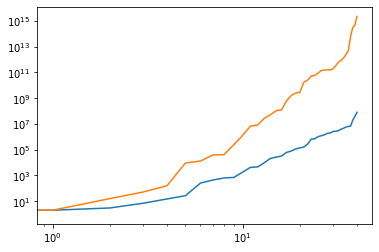

In [ ]:
import time
import matplotlib.pyplot as plt
ln = []
lm = []

start_time = time.perf_counter()

mmax = 0
for n in range(100000000):
  m = collatz_max(n)
  if (m > mmax):
    print(n, m)
    ln.append(n)
    lm.append(m)
    mmax = m

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print()
print("★処理時間[秒]：", format(elapsed_time, '.5f'))

plt.plot(ln, label='n')
plt.xscale('log')
plt.plot(lm, label='m')
plt.yscale('log')
plt.show()

# パラメータを変えていろいろ試してみる

https://mathlandscape.com/collatz/
によるとダメっぽいですね、、、😅

In [ ]:
def collatz_params(k, n):
    #print("k:", k)
    print(n, end="")
    while (n > 1):
        if (n % 2 == 0):
            n = n // 2
        else:
            n = k * n + 1
        print(" →", n, end="")
    print()

In [ ]:
collatz_params(3, 3)

3 → 10 → 5 → 16 → 8 → 4 → 2 → 1


In [ ]:
k = 3
print("k:", k)
collatz_params(k, 3)
collatz_params(k, 4)
collatz_params(k, 5)
collatz_params(k, 6)
collatz_params(k, 7)
collatz_params(k, 8)
collatz_params(k, 9)
collatz_params(k, 10)

print()

k = 5
print("k:", k)
collatz_params(k, 3)
collatz_params(k, 4)
collatz_params(k, 5) #NG(無限LOOP)
collatz_params(k, 6)
##collatz_params(k, 7) #NG(無限LOOP)
collatz_params(k, 8)
#collatz_params(k, 9) #NG(無限LOOP)
#collatz_params(k, 10) #NG(無限LOOP)

k: 3
3 → 10 → 5 → 16 → 8 → 4 → 2 → 1
4 → 2 → 1
5 → 16 → 8 → 4 → 2 → 1
6 → 3 → 10 → 5 → 16 → 8 → 4 → 2 → 1
7 → 22 → 11 → 34 → 17 → 52 → 26 → 13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1
8 → 4 → 2 → 1
9 → 28 → 14 → 7 → 22 → 11 → 34 → 17 → 52 → 26 → 13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1
10 → 5 → 16 → 8 → 4 → 2 → 1

k: 5
3 → 16 → 8 → 4 → 2 → 1
4 → 2 → 1
5 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 → 52 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 → 52 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 → 52 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 → 52 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 → 52 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 → 52 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 → 52 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 → 52 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 → 52 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 → 52 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 → 52 → 26 → 13 → 66 → 33 → 166 → 83 → 416 → 208 → 104 

KeyboardInterrupt: 

## 【↓】愛知県の高校生がいろいろ試してました。
https://toyotanishi-h.aichi-c.ed.jp/education/ssh/ss-bu/sska10.pdf

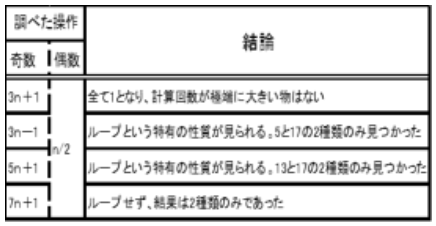